In [1]:
# Install necessary libraries (if not already present in Colab environment)
# These are usually pre-installed in Colab, so these commands might just confirm.
!pip install numpy pandas matplotlib seaborn scikit-learn

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for ML models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f"NumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")

NumPy Version: 2.0.2
Pandas Version: 2.2.2


### Part 1: Navigating Google Colab & Python Basics

Google Colab is a cloud-based Jupyter notebook environment. It allows you to write and execute Python code directly in your browser, with access to free GPUs/TPUs.

**Key Features:**
* **Code Cells:** Where you write and execute Python code.
* **Text Cells:** Where you write explanations, notes, and documentation using Markdown.
* **Runtime:** Connects your notebook to a virtual machine (VM) in the cloud to execute code.
* **Saving:** Notebooks are typically saved to your Google Drive.

**Tasks:**
* Demonstrate Code cells vs. Text cells.
* Demonstrate running code, connecting to runtime, saving.
* Basic Python operations: variables, data types, simple loops, conditional statements.
* Introduce NumPy: arrays, basic operations.

# --- 1.1 Code Cells vs. Text Cells ---
* You are currently reading this in a Text cell (Markdown).
* The cell below is a Code cell.
* You can add new cells using the "+ Code" or "+ Text" buttons above.

In [4]:
# --- 1.2 Running Code & Runtime ---
# To run this cell:
# 1. Click the "Play" button (triangle icon) on the left of the cell.
# 2. Or, press Shift + Enter.
# The first time you run a cell, Colab will connect to a runtime.
print("Hello from a Code Cell in Google Colab!")

Hello from a Code Cell in Google Colab!


In [5]:
# --- 1.3 Basic Python Operations ---
# Variables and Data Types
name = "Alice"
age = 30
height = 1.75 # meters
is_student = False

print(f"\nName: {name}, Type: {type(name)}")
print(f"Age: {age}, Type: {type(age)}")
print(f"Height: {height}, Type: {type(height)}")
print(f"Is Student: {is_student}, Type: {type(is_student)}")


Name: Alice, Type: <class 'str'>
Age: 30, Type: <class 'int'>
Height: 1.75, Type: <class 'float'>
Is Student: False, Type: <class 'bool'>


In [6]:
# Lists (ordered, mutable collection)
fruits = ["apple", "banana", "cherry"]
print(f"\nFruits list: {fruits}")
print(f"First fruit: {fruits[0]}")
fruits.append("date")
print(f"Fruits after append: {fruits}")


Fruits list: ['apple', 'banana', 'cherry']
First fruit: apple
Fruits after append: ['apple', 'banana', 'cherry', 'date']


In [7]:
# Dictionaries (unordered, mutable key-value pairs)
person = {"name": "Bob", "age": 25, "city": "New York"}
print(f"\nPerson dict: {person}")
print(f"Bob's age: {person['age']}")
person['city'] = "London"
print(f"Person after city update: {person}")


Person dict: {'name': 'Bob', 'age': 25, 'city': 'New York'}
Bob's age: 25
Person after city update: {'name': 'Bob', 'age': 25, 'city': 'London'}


In [9]:
# Conditional Statements
num = 10
if num > 0:
    print(f"\n{num} is positive.")
elif num < 0:
    print(f"{num} is negative.")
else:
    print(f"{num} is zero.")


10 is positive.


In [10]:
# Loops
print("\nLooping through fruits:")
for fruit in fruits:
    print(fruit)

print("\nLooping with range:")
for i in range(3): # 0, 1, 2
    print(f"Count: {i}")


Looping through fruits:
apple
banana
cherry
date

Looping with range:
Count: 0
Count: 1
Count: 2


In [11]:
# --- 1.4 Introduction to NumPy ---
# NumPy (Numerical Python) is fundamental for numerical computing in Python.
# It provides powerful N-dimensional array objects.

# Create a NumPy array
arr = np.array([1, 2, 3, 4, 5])
print(f"\nNumPy array: {arr}")
print(f"Array shape: {arr.shape}")
print(f"Array type: {type(arr)}")

# Basic operations
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(f"\n2D array:\n{arr_2d}")
print(f"2D array shape: {arr_2d.shape}")

# Element-wise operations
print(f"\nArray + 5: {arr + 5}")
print(f"Array * 2: {arr * 2}")

# Mathematical functions
print(f"Sum of array elements: {np.sum(arr)}")
print(f"Mean of 2D array: {np.mean(arr_2d)}")

# Reshaping arrays
arr_reshaped = arr.reshape(5, 1)
print(f"\nReshaped array (5x1):\n{arr_reshaped}")


NumPy array: [1 2 3 4 5]
Array shape: (5,)
Array type: <class 'numpy.ndarray'>

2D array:
[[1 2 3]
 [4 5 6]]
2D array shape: (2, 3)

Array + 5: [ 6  7  8  9 10]
Array * 2: [ 2  4  6  8 10]
Sum of array elements: 15
Mean of 2D array: 3.5

Reshaped array (5x1):
[[1]
 [2]
 [3]
 [4]
 [5]]


**Discussion Point:**
* What is the main advantage of using NumPy arrays over standard Python lists for numerical operations in Machine Learning?
* How can you tell if a cell is a Code cell or a Text cell in Google Colab?

### Part 2: Data Loading and Initial Exploration with Pandas

Pandas is a powerful library for data manipulation and analysis. Its primary data structures are `Series` (1D array-like) and `DataFrame` (2D table-like). We'll use a publicly available dataset, the Palmer Penguins dataset, which is often used as a simpler alternative to Iris for classification.

**Tasks:**
* Demonstrate loading a CSV file from a URL.
* Use Pandas functions: `pd.read_csv()`, `df.head()`, `df.info()`, `df.describe()`, `df.shape`, `df.columns`, `df['column'].value_counts()`.
* Basic data selection and filtering.

In [16]:
# --- 2.1 Load a CSV file ---
# We'll use the Palmer Penguins dataset, hosted on a common GitHub repository.
# This dataset contains measurements for three species of penguins.
data_url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
try:
    df = pd.read_csv(data_url)
    print(f"\nSuccessfully loaded data from: {data_url}")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please check the URL or your internet connection.")
    # Fallback to a local dataset if online fails
    # You might need to upload a local CSV if this fails persistently
    # For now, we'll assume it works or handle gracefully.
    df = pd.DataFrame() # Empty DataFrame to prevent errors later
if not df.empty:
  print("DataFrame is not empty. You can proceed with data exploration!")
else:
    print("DataFrame is empty. Cannot proceed with data exploration.")


Successfully loaded data from: https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv
DataFrame is not empty. You can proceed with data exploration!


In [15]:
# --- 2.2 Initial Data Inspection ---
print("\n--- df.head() (First 5 rows) ---")
print(df.head())

print("\n--- df.info() (Summary of DataFrame, Non-Null counts, dtypes) ---")
df.info()

print("\n--- df.describe() (Statistical summary of numerical columns) ---")
print(df.describe())

print("\n--- df.shape (Number of rows, columns) ---")
print(f"DataFrame shape: {df.shape} (rows, columns)")

print("\n--- df.columns (List of column names) ---")
print(f"Column names: {df.columns.tolist()}")

# --- 2.3 Basic Data Selection and Filtering ---
# Select a single column (Series)
print("\n--- Selecting a single column ('species') ---")
print(df['species'].head())

# Select multiple columns (DataFrame)
print("\n--- Selecting multiple columns ('species', 'bill_length_mm') ---")
print(df[['species', 'bill_length_mm']].head())

# Filtering rows based on a condition
print("\n--- Filtering rows where species is 'Adelie' ---")
adelie_penguins = df[df['species'] == 'Adelie']
print(adelie_penguins.head())

# Count unique values in a categorical column
print("\n--- Value counts for 'species' ---")
print(df['species'].value_counts())

print("\n--- Value counts for 'island' ---")
print(df['island'].value_counts())



--- df.head() (First 5 rows) ---
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

--- df.info() (Summary of DataFrame, Non-Null counts, dtypes) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island         

**Discussion Point:**
* What insights can you gather about the dataset just by looking at `df.info()` and `df.describe()`?
* How does `df.head()` differ from `df.tail()`? When would you use each?

### Part 3: Data Preprocessing and Visualization

Real-world datasets are rarely clean. Data preprocessing involves handling missing values, encoding categorical features, and scaling numerical features. Visualization helps us understand data distributions and relationships.

**Tasks:**
* Identify and handle missing values (`df.isnull().sum()`, `df.dropna()`, `df.fillna()`).
* Handle categorical features (Label Encoding or One-Hot Encoding).
* Use Matplotlib and Seaborn for data visualization.

In [18]:
# --- 3.1 Identify and Handle Missing Values ---
print("\n--- Missing values before handling ---")
print(df.isnull().sum())

# Strategy: Drop rows with any missing values for simplicity in this intro lab.
# For more complex scenarios, imputation (e.g., mean, median, mode) might be preferred.
df_cleaned = df.dropna().copy()  # .copy() to avoid SettingWithCopyWarning

print("\n--- Missing values after dropping rows ---")
print(df_cleaned.isnull().sum())
print(f"Original shape: {df.shape}, Cleaned shape: {df_cleaned.shape}")


--- Missing values before handling ---
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

--- Missing values after dropping rows ---
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64
Original shape: (344, 8), Cleaned shape: (333, 8)


In [19]:
# --- 3.2 Handle Categorical Features ---
# The 'species' column is our target variable, which is categorical.
# The 'island' and 'sex' columns are also categorical features.

from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For the target variable ('species'), we'll use Label Encoding
# It converts categories into numerical labels (0, 1, 2...)
# This is suitable for target variables in classification where order doesn't imply meaning.
le = LabelEncoder()
df_cleaned['species_encoded'] = le.fit_transform(df_cleaned['species'])
print(f"\nOriginal species: {df_cleaned['species'].unique()}")
print(f"Encoded species: {df_cleaned['species_encoded'].unique()}")
print(f"Species mapping: {list(le.classes_)}")

# For other categorical features ('island', 'sex'), we'll use One-Hot Encoding
# This creates new binary columns for each category. It's preferred for features
# to avoid implying an arbitrary order that doesn't exist.
df_processed = pd.get_dummies(df_cleaned, columns=['island', 'sex'], drop_first=True)  # drop_first avoids multicollinearity
print("\n--- DataFrame after One-Hot Encoding for 'island' and 'sex' ---")
print(df_processed.head())
print(f"Processed DataFrame shape: {df_processed.shape}")


Original species: ['Adelie' 'Gentoo' 'Chinstrap']
Encoded species: [0 2 1]
Species mapping: ['Adelie', 'Chinstrap', 'Gentoo']

--- DataFrame after One-Hot Encoding for 'island' and 'sex' ---
  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
4  Adelie            36.7           19.3              193.0       3450.0   
5  Adelie            39.3           20.6              190.0       3650.0   

   year  species_encoded  island_Dream  island_Torgersen  sex_male  
0  2007                0         False              True      True  
1  2007                0         False              True     False  
2  2007                0         False              True     False  
4  2007                0         False              True     False  
5  200


--- Visualizing Data ---


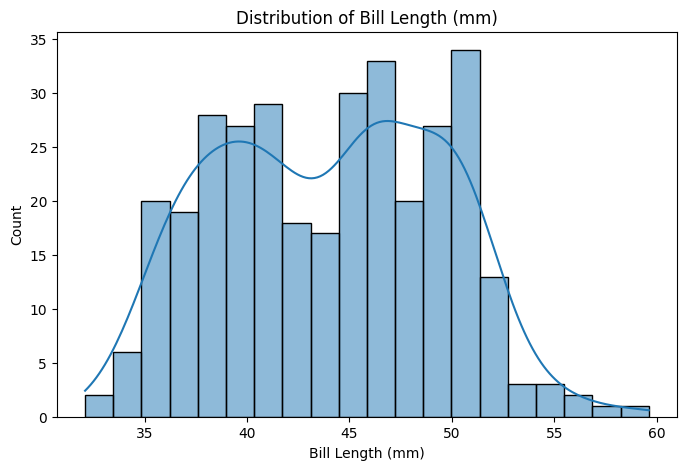

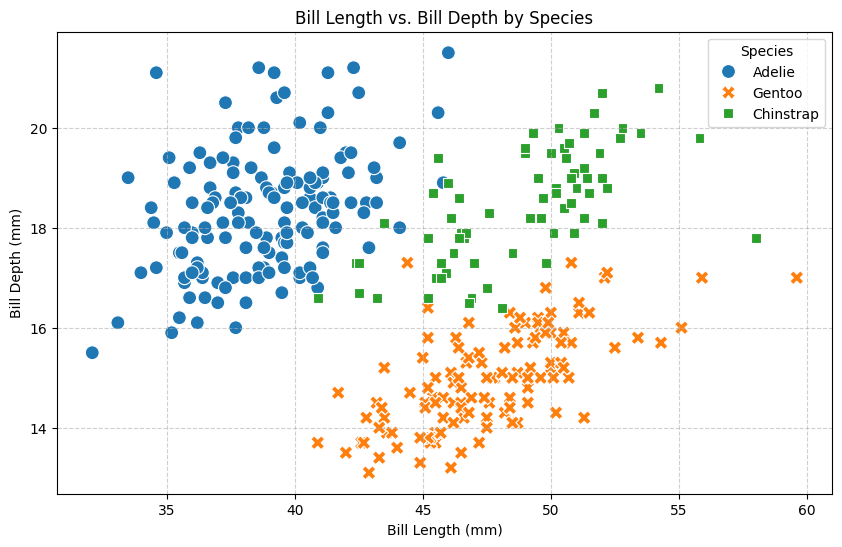

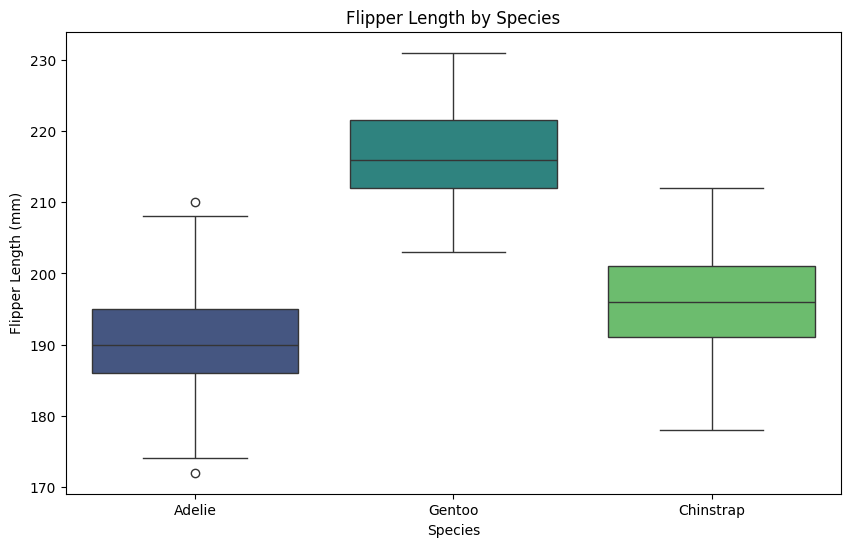

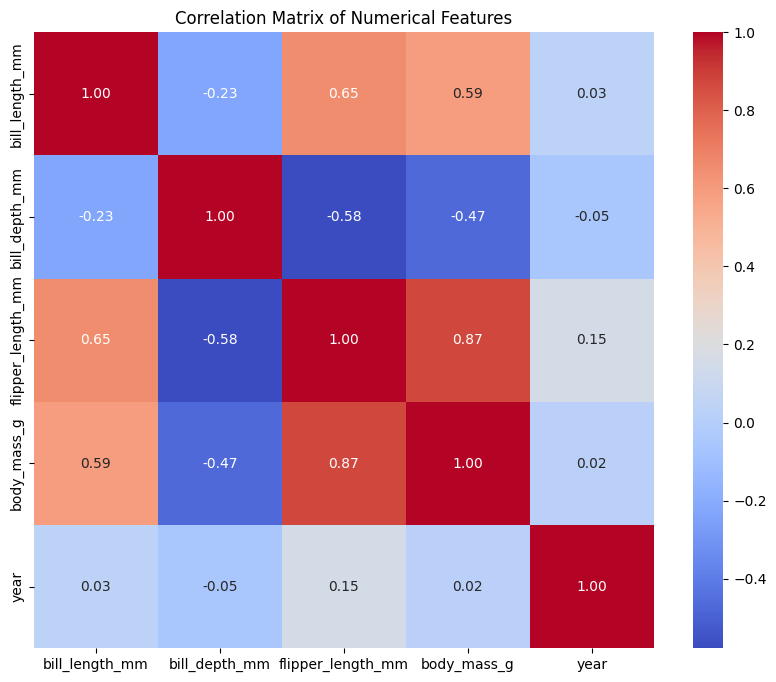

In [20]:
# --- 3.3 Data Visualization with Matplotlib and Seaborn ---
print("\n--- Visualizing Data ---")

# Histogram of bill_length_mm
plt.figure(figsize=(8, 5))
sns.histplot(df_processed['bill_length_mm'], kde=True, bins=20)
plt.title('Distribution of Bill Length (mm)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Count')
plt.show()

# Scatter plot of bill_length vs. bill_depth, colored by species
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_processed, x='bill_length_mm', y='bill_depth_mm', hue='species', style='species', s=100)
plt.title('Bill Length vs. Bill Depth by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Box plot of flipper_length_mm by species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_processed, x='species', y='flipper_length_mm', palette='viridis')
plt.title('Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

# Correlation matrix (only for numerical features)
# Drop the original 'species' column to only consider numerical and encoded
numerical_df = df_processed.select_dtypes(include=np.number).drop(columns=['species_encoded'])  # Drop target for correlation calc
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Discussion Point:**
* Why is it important to handle missing values before training a machine learning model? What are some alternatives to simply dropping rows?
* Explain the difference between Label Encoding and One-Hot Encoding. When would you prefer one over the other?

### Part 4: Introduction to Machine Learning (Supervised Learning)

Machine learning involves training algorithms to learn patterns from data, enabling them to make predictions or decisions without being explicitly programmed. Supervised learning is a common type where the model learns from labeled data (input-output pairs).

**Tasks:**
* Briefly explain Supervised Learning (Classification vs. Regression).
* Select features (X) and target (y) columns.
* Split data into training and testing sets (`train_test_split`).
* Apply feature scaling (`StandardScaler`).
* Choose and train a simple classification model (Logistic Regression).
* Make predictions on the test set.
* Evaluate the model using basic metrics (Accuracy, Classification Report, Confusion Matrix).

In [21]:
# --- 4.1 Supervised Learning Overview ---
# Supervised Learning: Learning from a dataset of input-output pairs.
#    - Classification: Predicting a categorical (discrete) output (e.g., penguin species, spam/not spam).
#    - Regression: Predicting a continuous numerical output (e.g., house price, temperature).
# Our task: Predict 'species_encoded' (0, 1, 2) based on other features, so it's a Classification problem.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# --- 4.2 Select Features (X) and Target (y) ---
X = df_processed.drop(columns=['species', 'species_encoded'])
y = df_processed['species_encoded']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Features columns: {X.columns.tolist()}")


Features (X) shape: (333, 8)
Target (y) shape: (333,)
Features columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year', 'island_Dream', 'island_Torgersen', 'sex_male']


In [23]:
# --- 4.3 Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set X shape: {X_train.shape}, y shape: {y_train.shape}")
print(f"Testing set X shape: {X_test.shape}, y shape: {y_test.shape}")


Training set X shape: (266, 8), y shape: (266,)
Testing set X shape: (67, 8), y shape: (67,)


In [24]:
# --- 4.4 Apply Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully.")
print(f"Example of scaled data (first 5 rows of X_train_scaled):\n{X_train_scaled[:5]}")


Features scaled successfully.
Example of scaled data (first 5 rows of X_train_scaled):
[[ 0.16732502 -1.99231135  0.83478089  1.08239437 -0.01828334 -0.76994439
  -0.41449508 -1.0461779 ]
 [ 1.22705014  1.25552054  0.1212471  -0.21564233  1.19755866  1.29879509
  -0.41449508  0.95586038]
 [ 0.87989881 -0.52063753  1.4769613   2.19499725  1.19755866 -0.76994439
  -0.41449508  0.95586038]
 [-0.47216428  0.64655206  0.04989372 -0.43198178  1.19755866 -0.76994439
   2.4125739   0.95586038]
 [-1.16646695  1.05253105 -1.44852725 -1.1428114  -1.23412534  1.29879509
  -0.41449508 -1.0461779 ]]


In [25]:
# --- 4.5 Choose and Train a Simple Classification Model (Logistic Regression) ---
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

print("\nLogistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [26]:
# --- 4.6 Make Predictions on the Test Set ---
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

print(f"\nFirst 5 true labels (test set): {y_test.tolist()[:5]}")
print(f"First 5 predicted labels: {y_pred.tolist()[:5]}")
print(f"First 5 predicted probabilities:\n{y_pred_proba[:5]}")


First 5 true labels (test set): [2, 1, 0, 2, 2]
First 5 predicted labels: [2, 1, 0, 2, 2]
First 5 predicted probabilities:
[[2.30976158e-04 1.70105546e-02 9.82758469e-01]
 [2.80995084e-02 9.62237583e-01 9.66290876e-03]
 [9.89169208e-01 9.41251074e-03 1.41828077e-03]
 [5.67323150e-04 5.85620937e-03 9.93576467e-01]
 [8.92716738e-04 9.42269124e-03 9.89684592e-01]]



Model Accuracy on Test Set: 0.9851

--- Classification Report ---
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



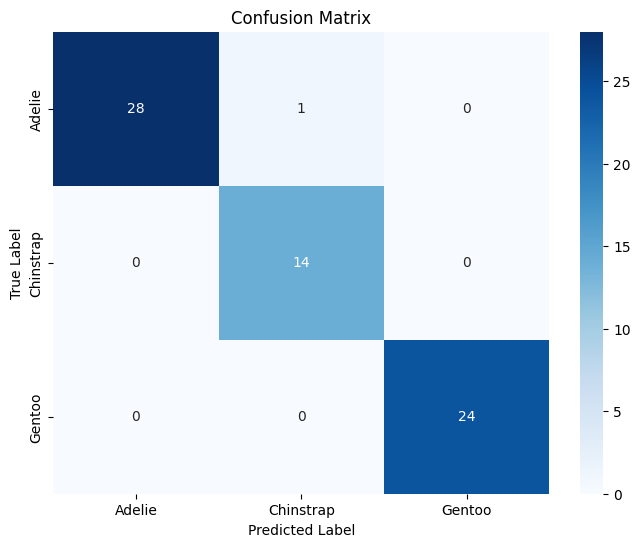

In [27]:
# --- 4.7 Evaluate the Model ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

target_names = le.classes_
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Discussion Point:**
* Why is it crucial to split data into training and testing sets? What problem does it help to address?
* What is the purpose of `StandardScaler`? Why might it be important for a model like Logistic Regression?

### Part 5: Further Exploration & Ethical Considerations (Text Cell)

This section aims to provide a broader context for what we've learned and to introduce some important ethical considerations in Machine Learning.

**Discussion Topics:**
* **Types of Machine Learning:** Elaborate on Supervised, Unsupervised, and Reinforcement Learning.
* **Overfitting & Underfitting:** Explain these concepts and their impact.
* **Model Selection:** Briefly touch upon the importance of choosing the right model.
* **Bias and Fairness in ML:** Introduce the concept of bias in data and models, and its potential societal impact.
* **Interpretability vs. Performance:** Briefly discuss the trade-off between complex models and understanding their decisions.
* **Limitations of Simple Models and Data:** What are the inherent limitations of the basic models and preprocessing steps explored?





* **Types of Machine Learning:**
    * **Supervised Learning:** As seen in this lab, the model learns from a dataset of labeled examples, where each input has a corresponding correct output. The goal is to learn a mapping from inputs to outputs to make predictions on new, unseen data.
        * **Classification:** Predicts a discrete category (e.g., "spam" or "not spam", "cat" or "dog", "penguin species").
        * **Regression:** Predicts a continuous numerical value (e.g., house price, temperature, stock value).
    * **Unsupervised Learning:** The model learns from unlabeled data, aiming to discover hidden patterns, structures, or relationships within the data. There is no "correct" output to predict.
        * **Clustering:** Groups similar data points together (e.g., customer segmentation, grouping similar documents).
        * **Dimensionality Reduction:** Reduces the number of features while retaining important information (e.g., PCA for visualizing high-dimensional data).
    * **Reinforcement Learning:** An agent learns to make decisions by interacting with an environment. It receives rewards or penalties for its actions, and its goal is to learn a policy that maximizes the cumulative reward over time. Often used in robotics, game playing (e.g., AlphaGo), and autonomous driving.

* **Overfitting & Underfitting:**
    * **Overfitting:** Occurs when a model learns the training data too well, including the noise and random fluctuations. It performs excellently on the training data but poorly on new, unseen data. It's like memorizing answers for a test without understanding the concepts.
        * *Signs:* High training accuracy, significantly lower validation/test accuracy.
        * *Causes:* Model is too complex for the amount of data, noisy data, insufficient training data.
        * *Mitigation:* More data, simpler models, regularization (e.g., L1/L2 regularization in Logistic Regression), cross-validation, dropout (in neural networks).
    * **Underfitting:** Occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and test data. It's like not studying enough for a test.
        * *Signs:* Low training accuracy, similarly low validation/test accuracy.
        * *Causes:* Model is too simple, insufficient features, too much regularization.
        * *Mitigation:* More complex models, more relevant features, reducing regularization.

* **Model Selection:**
    Choosing the "right" machine learning model is crucial and often involves experimentation. There's no single best model for all problems. Factors influencing model selection include:
    * **Nature of the problem:** Classification, regression, clustering, etc.
    * **Size and complexity of the dataset:** Small datasets might prefer simpler models, while large datasets can benefit from more complex ones.
    * **Interpretability requirements:** Some applications demand transparent models (e.g., medical diagnosis), while others prioritize performance (e.g., image recognition).
    * **Computational resources:** Training very complex models can be time and resource intensive.
    * **Assumptions of the model:** Different models make different assumptions about the data.

* **Bias and Fairness in ML:**
    Machine learning models are trained on data, and if that data reflects existing societal biases (e.g., historical discrimination, underrepresentation of certain groups), the model will learn and perpetuate those biases.
    * **Data Bias:** This can occur in sampling (e.g., data collected from only one demographic), historical data (reflecting past inequalities), or measurement (e.g., sensor bias).
    * **Algorithmic Bias:** Can arise from the design of the algorithm itself, or how it's optimized (e.g., optimizing for overall accuracy might disproportionately impact minority groups).
    * **Impact:** Biased models can lead to unfair or discriminatory outcomes in critical applications like loan approvals, hiring, criminal justice, or healthcare.
    * **Mitigation:** Careful data collection, bias detection and mitigation techniques, diverse development teams, fairness-aware algorithms, and continuous monitoring are essential.

* **Interpretability vs. Performance:**
    There's often a trade-off between a model's performance (e.g., high accuracy) and its interpretability (how easily humans can understand why it made a certain prediction).
    * **Highly Interpretable Models:** Linear Regression, Logistic Regression, Decision Trees. You can often see which features contribute most and how they influence the prediction.
    * **High-Performance (Often "Black Box") Models:** Deep Neural Networks, Ensemble methods (Random Forests, Gradient Boosting). These models can achieve very high accuracy but their internal workings can be opaque, making it hard to explain individual predictions.
    * **Context Matters:** For high-stakes applications (e.g., medical diagnosis, legal decisions), interpretability might be prioritized over marginal gains in performance. For other applications (e.g., image recognition, recommendation systems), high performance might be the primary goal.

* **Limitations of Simple Models and Data:**
    * **Linearity Assumption:** Models like Logistic Regression assume a linear relationship between features and the target. If the underlying data has complex non-linear patterns, a linear model will underfit.
    * **Limited Feature Interaction:** Simple models might struggle to capture complex interactions between multiple features.
    * **Data Quality:** Even with powerful models, "garbage in, garbage out" applies. Poor quality data (noisy, incomplete, biased) will lead to poor model performance.
    * **Need for Domain Expertise:** Simple models, while interpretable, might not capture nuanced domain-specific knowledge unless features are carefully engineered with that expertise.
    * **Scalability:** While efficient for small datasets, very large datasets might still pose memory or computational challenges for even simple models if not handled appropriately.
    * **Feature Engineering Importance:** For simple models, the quality and relevance of features are paramount. If crucial features are missing or poorly represented, the model's performance will be limited.

---
  
<center>

<span style="color:#1f4e79">

Prepared By

**<span style="font-size:1.5em">Md. Atikuzzaman</span>**  
Lecturer  
Department of Computer Science and Engineering  
Green University of Bangladesh  
Email: atik@cse.green.edu.bd  

</span>
</center>

---
